In [1]:
import cv2
import base64
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from openai import OpenAI
from PIL import Image
from tqdm import tqdm

In [2]:
import re
import easyocr

reader = easyocr.Reader(['en'])
def process_string(s):
    s = s.replace(" ", "")  # Remove all whitespaces
    if re.fullmatch(r"\d+/\d+/\d+", s):  # Check if it matches int/int/int
        return s
    return None 

/usr/local/Caskroom/miniconda/base/envs/whisper/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [31]:
video_path = "/Users/rusiq/Downloads/youtube_dl/katka2_nosound1080p.mp4"
frame_number = 2000
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
cap.release()

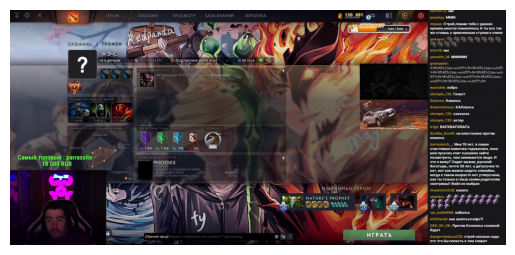

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

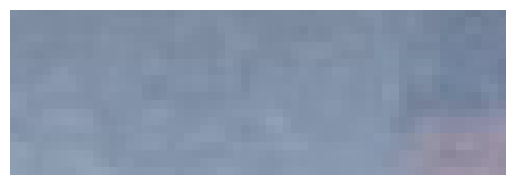

In [33]:
x, y, w, h = 100, 65, 60, 20  # Change these values based on your ROI
cropped = frame[y:y+h, x:x+w]

# Cell 5: Show cropped frame
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

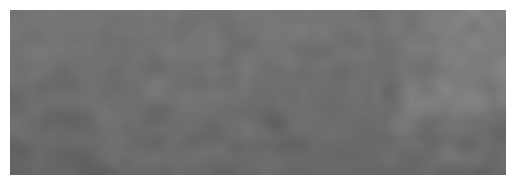

In [34]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

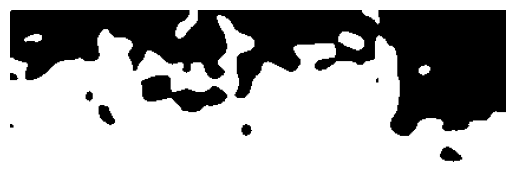

In [35]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, None, fx=7, fy=7, interpolation=cv2.INTER_CUBIC)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding with Otsu's binarization
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show result
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
results = reader.readtext(binary)
print(results[0][1])
process_string(results[0][1])

0 / 0 | 0


In [ ]:
import os
api_key = os.getenv('OPENAI_API_KEY')

client = OpenAI(api_key = api_key)

def ocr_from_opencv_image(image_list):
    """Processes an OpenCV image for OCR using OpenAI's GPT-4o-mini"""
    
    # Convert OpenCV image to PIL format
    pil_image = Image.fromarray(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))
    
    # Encode image as base64
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    image_data = base64.b64encode(buffered.getvalue()).decode("utf-8")

    # Send to OpenAI API
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "Extract text from the image in the format 'x/y/z' where x, y, and z are integers."},
                    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_data}"}}
                ]
            }
        ],
        max_tokens=10
    )

    return response.choices[0].message.content

# Example usage
result = ocr_from_opencv_image(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
print(result)

2/1/1


In [192]:
model_name="OpenGVLab/InternVL2.5-8B"
device="cpu"

# Set device (GPU or CPU)
print(f"Using device: {device}")

# Load model and processor
model = AutoModel.from_pretrained("OpenGVLab/InternVL2_5-8B", trust_remote_code=True)

# Set model to evaluation mode
model.eval()
print("Model loaded successfully!")

Using device: cpu


A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- modeling_intern_vit.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/Caskroom/miniconda/base/envs/whisper/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


FlashAttention2 is not installed.


  warnings.warn(


KeyboardInterrupt: 